<a href="https://colab.research.google.com/github/dqdung1604/AI_Sem2_2022-2023/blob/main/AI_W11_2022-2023(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')/255

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_test.shape

(10000, 28, 28, 1)

In [13]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_train.shape

(60000, 10)

In [15]:
y_test.shape

(10000, 10)

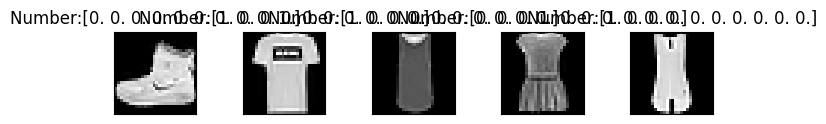

In [16]:
import matplotlib.pyplot as plt
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('Number:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [17]:
print(y_test)
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [25]:
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10, activation = 'softmax'))
from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Loss:', test_loss)
print('Acuraccy', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4751 - accuracy: 0.9207
Loss: 0.4751460552215576
Acuraccy 0.9207000136375427


In [23]:
model.save('fashion_mnist.h5')